In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
df=df.drop(columns=['ocean_proximity'],axis=1)

In [13]:
c=df.corr()

In [15]:
c['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [16]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>]], dtype=object)

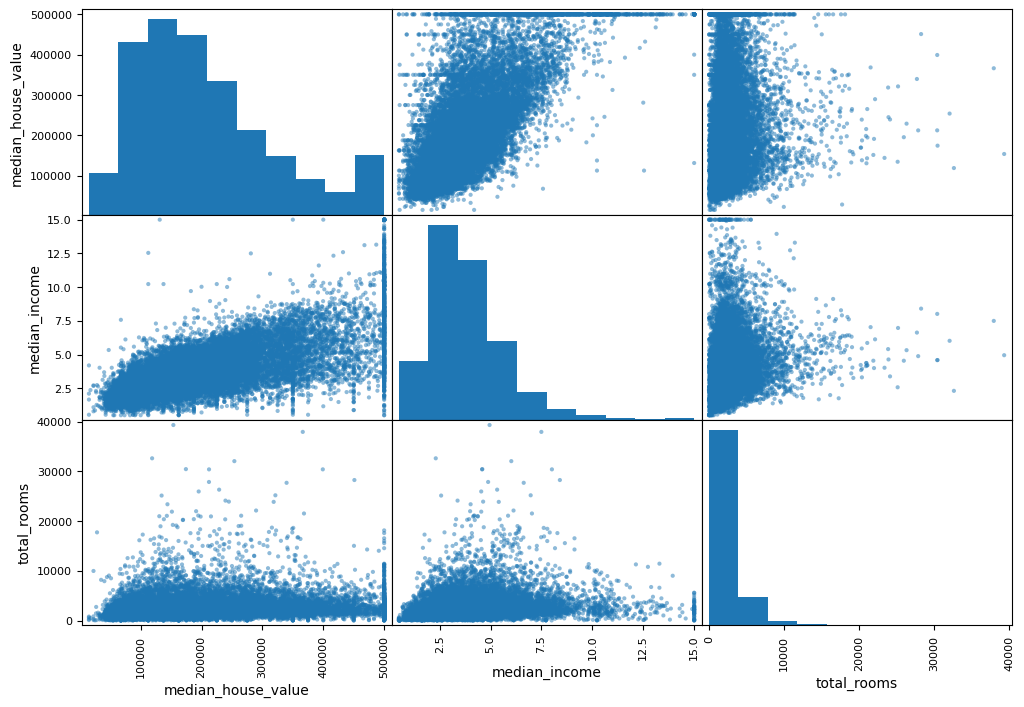

In [19]:
attributes = ['median_house_value','median_income','total_rooms']
scatter_matrix(df[attributes], figsize=(12,8))

In [20]:
df['bedrooms_per_rooms']= df['total_bedrooms']/df['total_rooms']
df['rooms_per_household']= df['total_rooms']/df['households']
df['population_per_household']= df['population']/df['households']

In [21]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_rooms,rooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.146591,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.155797,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.129516,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.184458,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.172096,6.281853,2.181467


In [22]:
c=df.corr()
c['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   bedrooms_per_rooms        20433 non-null  float64
 10  rooms_per_household       20640 non-null  float64
 11  population_per_household  20640 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


In [24]:
median = df['total_bedrooms'].median()

In [25]:
df['total_bedrooms'].fillna(median,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   bedrooms_per_rooms        20433 non-null  float64
 10  rooms_per_household       20640 non-null  float64
 11  population_per_household  20640 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


In [27]:
median = df['bedrooms_per_rooms'].median()
df['bedrooms_per_rooms'].fillna(median,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   bedrooms_per_rooms        20640 non-null  float64
 10  rooms_per_household       20640 non-null  float64
 11  population_per_household  20640 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


# Using Pipeline

In [28]:
df=pd.read_csv('housing.csv')

In [29]:
df['bedrooms_per_rooms']= df['total_bedrooms']/df['total_rooms']
df['rooms_per_household']= df['total_rooms']/df['households']
df['population_per_household']= df['population']/df['households']

In [33]:
df_num = df.drop(columns=['ocean_proximity'],axis=1)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [35]:
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy='median')),('std_scaler',StandardScaler())])


In [36]:
df_num_tr = num_pipeline.fit_transform(df_num)

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attributes = list(df_num)
cat_attributes = ['ocean_proximity']

full_pipeline= ColumnTransformer([('num',num_pipeline,num_attributes),('cat',OneHotEncoder(),cat_attributes)])

df_prepared = full_pipeline.fit_transform(df)

In [40]:
dfo = pd.read_csv('housing.csv')
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(dfo)

In [41]:
df_label = df['median_house_value'].copy()

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df_prepared,df_label)

LinearRegression()

In [43]:
some_data = df.iloc[:5]
some_label = df_label[:5]

In [44]:
some_data_prepare = full_pipeline.transform(some_data)
print("Predicted data: ", lr.predict(some_data_prepare))
print("Actual data: ", list(some_label))

Predicted data:  [452600. 358500. 352100. 341300. 342200.]
Actual data:  [452600.0, 358500.0, 352100.0, 341300.0, 342200.0]


In [48]:
from sklearn.metrics import mean_squared_error
import numpy as np

df_pred = lr.predict(df_prepared)
lin_mse = mean_squared_error(df_label,df_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.382041878944769e-10

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(df_prepared,df_label)

DecisionTreeRegressor()

In [52]:
df_pred = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_label,df_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,df_prepared,df_label,scoring='neg_mean_squared_error',cv=5)

In [54]:
tree_reg_rmse_score = np.sqrt(-scores)

tree_reg_rmse_score

array([198.80639527, 106.61843439, 111.81964927, 179.16554128,
        98.79359503])

In [56]:
from sklearn.model_selection import GridSearchCV

params_grid = {'ccp_alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7],'min_samples_split':[2,3,4,5,6,7,8]}

tree_reg = DecisionTreeRegressor()
gs = GridSearchCV(tree_reg,params_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

gs.fit(df_prepared,df_label)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [58]:
gr = gs.cv_results_

for mean_score,params in zip(gr['mean_test_score'],gr['params']) :
    print(np.sqrt(-mean_score),params)

124.00574163019954 {'ccp_alpha': 0.1, 'min_samples_split': 2}
130.40820479478444 {'ccp_alpha': 0.1, 'min_samples_split': 3}
151.76804473246534 {'ccp_alpha': 0.1, 'min_samples_split': 4}
129.9983050273961 {'ccp_alpha': 0.1, 'min_samples_split': 5}
97.88244496334778 {'ccp_alpha': 0.1, 'min_samples_split': 6}
134.80125606242683 {'ccp_alpha': 0.1, 'min_samples_split': 7}
137.43036484867707 {'ccp_alpha': 0.1, 'min_samples_split': 8}
151.1647335539414 {'ccp_alpha': 0.2, 'min_samples_split': 2}
150.79007551534175 {'ccp_alpha': 0.2, 'min_samples_split': 3}
105.7735303350026 {'ccp_alpha': 0.2, 'min_samples_split': 4}
115.32477406087692 {'ccp_alpha': 0.2, 'min_samples_split': 5}
153.12703363456208 {'ccp_alpha': 0.2, 'min_samples_split': 6}
134.41942173680187 {'ccp_alpha': 0.2, 'min_samples_split': 7}
138.97771314656066 {'ccp_alpha': 0.2, 'min_samples_split': 8}
127.49354548903379 {'ccp_alpha': 0.3, 'min_samples_split': 2}
121.6747691255337 {'ccp_alpha': 0.3, 'min_samples_split': 3}
128.602330087

In [60]:
from sklearn.model_selection import RandomizedSearchCV

params_grid = {'ccp_alpha':[np.random.uniform(0.0,0.9)],'min_samples_split':[2,3,4,5,6,7,8], 'max_depth':[int(x) for x in np.linspace(10,150,num=15)]}

tree_reg = DecisionTreeRegressor()
rs = RandomizedSearchCV(tree_reg,params_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

rs.fit(df_prepared,df_label)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'ccp_alpha': [0.015110010644833383],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8]},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [61]:
r = rs.cv_results_

for mean_score,params in zip(r['mean_test_score'],r['params']) :
    print(np.sqrt(-mean_score),params)

136.36500037370007 {'min_samples_split': 8, 'max_depth': 150, 'ccp_alpha': 0.015110010644833383}
103.5857898853435 {'min_samples_split': 3, 'max_depth': 20, 'ccp_alpha': 0.015110010644833383}
117.88265016190375 {'min_samples_split': 2, 'max_depth': 80, 'ccp_alpha': 0.015110010644833383}
133.75393468305913 {'min_samples_split': 7, 'max_depth': 20, 'ccp_alpha': 0.015110010644833383}
122.74862613058333 {'min_samples_split': 3, 'max_depth': 130, 'ccp_alpha': 0.015110010644833383}
134.77422197849927 {'min_samples_split': 5, 'max_depth': 50, 'ccp_alpha': 0.015110010644833383}
132.48661781144648 {'min_samples_split': 4, 'max_depth': 140, 'ccp_alpha': 0.015110010644833383}
133.9875115992567 {'min_samples_split': 7, 'max_depth': 100, 'ccp_alpha': 0.015110010644833383}
99.48117524521864 {'min_samples_split': 5, 'max_depth': 100, 'ccp_alpha': 0.015110010644833383}
127.2834132875362 {'min_samples_split': 4, 'max_depth': 120, 'ccp_alpha': 0.015110010644833383}
